In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

In [3]:
orf_data = np.load("ORF_full_healpy_nside_128.npz")

In [4]:
list(orf_data.keys())

['freqs',
 'ORF_HL',
 'ORF_HV',
 'ORF_LV',
 'ORF_HK',
 'ORF_LK',
 'ORF_VK',
 'ORF_HI',
 'ORF_LI',
 'ORF_VI',
 'ORF_KI']

In [5]:
keys_HLV = ['ORF_HL', 'ORF_HV', 'ORF_LV']
keys_HLVK = ['ORF_HK', 'ORF_LK', 'ORF_VK']

0.0 1000.0


<ipython-input-6-532572f80abe>:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(np.min(freqs), 1000)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


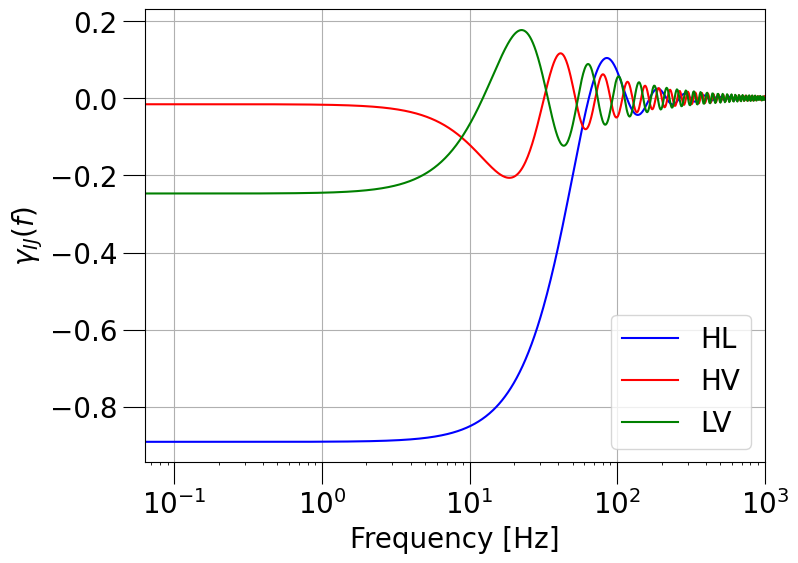

<ipython-input-6-532572f80abe>:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1000)
<ipython-input-6-532572f80abe>:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(np.min(freqs), 1000)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


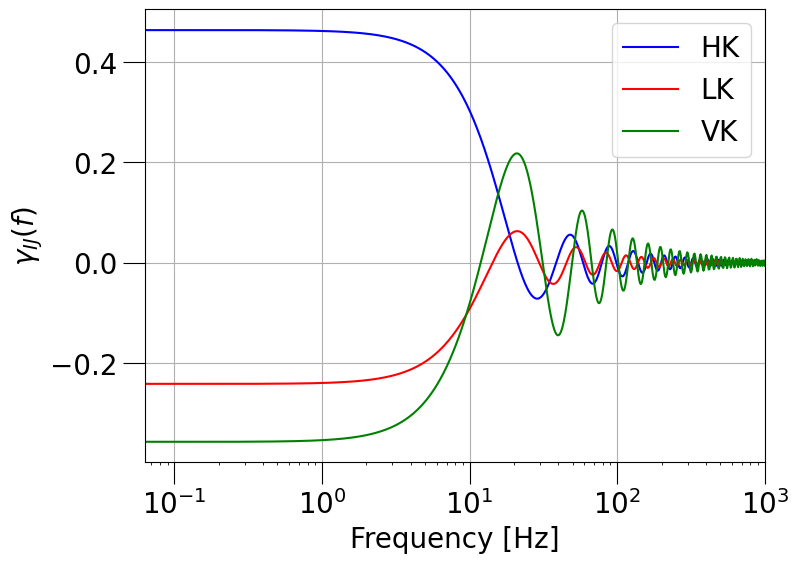

In [6]:
freqs = orf_data["freqs"]
print(np.min(freqs),np.max(freqs))
plt.plot(freqs, orf_data["ORF_HL"], color = "blue", label = "HL")
plt.plot(freqs, orf_data["ORF_HV"], color = "red", label = "HV")
plt.plot(freqs, orf_data["ORF_LV"], color = "green", label = "LV")
plt.xscale("log")
plt.xlim(np.min(freqs), 1000)
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$\gamma_{IJ}(f)$")
plt.grid()
plt.legend()
plt.savefig("ORF_iso_HLV.pdf", bbox_inches = "tight")
plt.savefig("ORF_iso_HLV.svg", bbox_inches = "tight")
plt.savefig("ORF_iso_HLV.eps", bbox_inches = "tight")
plt.show()
plt.close()

plt.plot(freqs, orf_data["ORF_HK"], color = "blue", label = "HK")
plt.plot(freqs, orf_data["ORF_LK"], color = "red", label = "LK")
plt.plot(freqs, orf_data["ORF_VK"], color = "green", label = "VK")
plt.xscale("log")
plt.xlim(0, 1000)
plt.xlim(np.min(freqs), 1000)
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$\gamma_{IJ}(f)$")
plt.grid()
plt.legend()
plt.savefig("ORF_iso_HLVK.pdf", bbox_inches = "tight")
plt.savefig("ORF_iso_HLVK.svg", bbox_inches = "tight")
plt.savefig("ORF_iso_HLVK.eps", bbox_inches = "tight")
plt.show()
plt.close()

## Unique figure

<ipython-input-23-42370f1723e2>:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax_HLV.set_xlim(np.min(freqs), 1000)
<ipython-input-23-42370f1723e2>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax_HLVK.set_xlim(np.min(freqs), 1000)


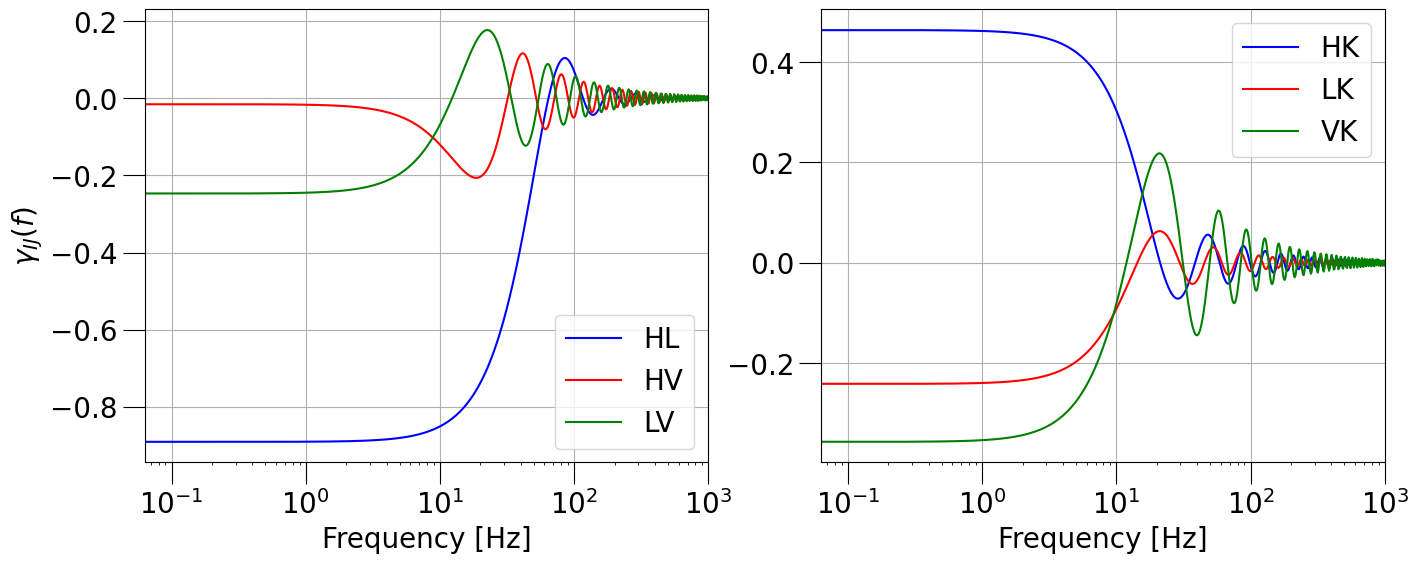

In [23]:
fig, (ax_HLV, ax_HLVK) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

ax_HLV.plot(freqs, orf_data["ORF_HL"], color = "blue", label = "HL")
ax_HLV.plot(freqs, orf_data["ORF_HV"], color = "red", label = "HV")
ax_HLV.plot(freqs, orf_data["ORF_LV"], color = "green", label = "LV")
ax_HLV.set_xscale("log")
ax_HLV.set_xlim(np.min(freqs), 1000)
ax_HLV.set_xlabel("Frequency [Hz]")
ax_HLV.set_ylabel(r"$\gamma_{IJ}(f)$")
ax_HLV.grid()
ax_HLV.legend()

ax_HLVK.plot(freqs, orf_data["ORF_HK"], color = "blue", label = "HK")
ax_HLVK.plot(freqs, orf_data["ORF_LK"], color = "red", label = "LK")
ax_HLVK.plot(freqs, orf_data["ORF_VK"], color = "green", label = "VK")
ax_HLVK.set_xscale("log")
ax_HLVK.set_xlim(np.min(freqs), 1000)
ax_HLVK.set_xlabel("Frequency [Hz]")
#ax_HLVK.set_ylabel(r"$\gamma_{IJ}(f)$")#, labelpad=-15)
ax_HLVK.grid()
ax_HLVK.legend()
#plt.tight_layout(pad=0)
plt.savefig("ORF_iso_HLVK_unified.pdf", bbox_inches = "tight")

plt.show()
plt.close()